In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

R1 = 1415595.9112205505 N
R2 = -896575.228282571 N
M3 = -20421991.310880784 Nm


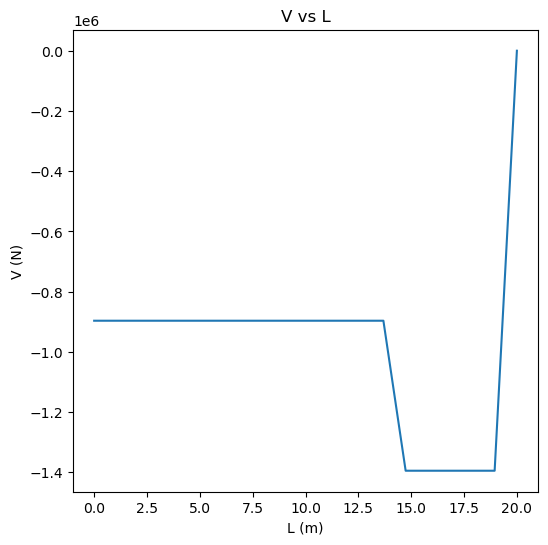

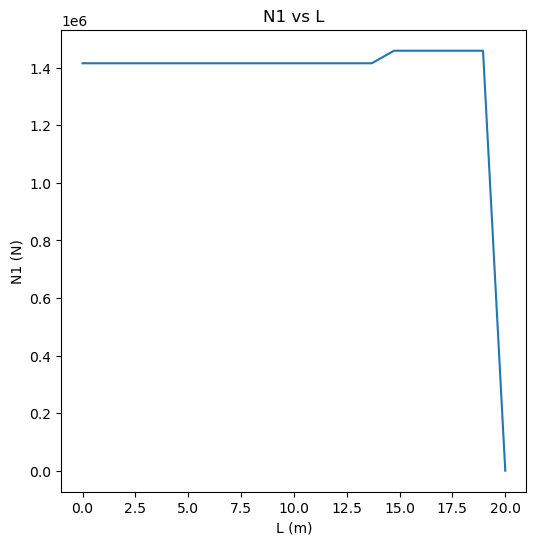

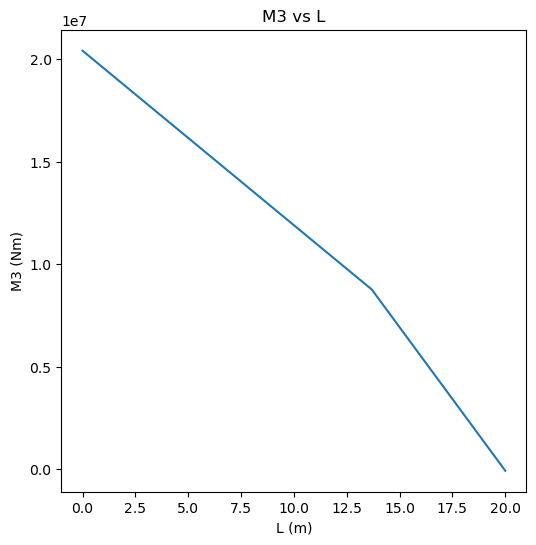

In [42]:
#EAE 135 Project 2
#Andrew Matel
#Nicholas Rusali

### Given Info
## Lengths
D = 3 #m
t_layers = 0.005 #m
L = 20 #m
Ri = 1.490 #m
Ra = 1.495 #m
Rc = 1.5 #m
## Forces
Thrust = 1250*(10**3) #N
Lift = 1400*(10**3) #N
Weight = 500*(10**3) #N
alf = math.radians(5) #rads

## Material Properties
#CFRP
E11_cfrp = 148.24 #GPa
E22_cfrp = 10.07 #GPa
G12_cfrp = 5.58 #GPa
v12_cfrp = 0.30 
#Al 6061
syc_Al = -289.6 #MPa (yield stress in compression)
syt_Al = 289.6 #MPa
Ec_Al = 69.69 #GPa
Et_Al = 68.95 #GPa
G_Al = 26.2 #GPa
v_Al = 0.33 #GPa

### Reactions at Cantilever
R1 = Thrust + (Lift+Weight)*(math.sin(alf))
R2 = (Weight - Lift)*math.cos(alf)
M3 = (Weight*(L-5)-Lift*L)*math.cos(alf)

print('R1 = {} N'.format(R1))
print('R2 = {} N'.format(R2))
print('M3 = {} Nm'.format(M3))

### Internal Force Calculations
Shear = np.zeros(20)
for i in range(0,len(Shear)):
    if (i<14):
        Shear[i] = R2
    elif (i>=14) & (i<19):
        Shear[i] = R2 - Weight*(math.cos(alf))
    else:
        Shear[i] = R2 - (Weight - Lift)*math.cos(alf)

plt.figure(figsize = [6,6])
plt.title('V vs L')
plt.xlabel('L (m)')
plt.ylabel('V (N)')
plt.plot(np.linspace(0,20,20), Shear)

N1 = np.zeros(20)
for i in range(0,len(N1)):
    if (i<14):
        N1[i] = R1
    elif (i>=14) & (i<19):
        N1[i] = R1 + Weight*(math.sin(alf))
    else:
        N1[i] = R1 - Thrust - (Lift+Weight)*(math.sin(alf))

plt.figure(figsize = [6,6])
plt.title('N1 vs L')
plt.xlabel('L (m)')
plt.ylabel('N1 (N)')
plt.plot(np.linspace(0,20,20), N1)

Mom = np.zeros(20)
for i in range(0,len(Mom)):
    if (i<14):
        Mom[i] = -M3 + ((M3+(-M3+(R2*15)))/15)*i
    elif (i>=14):
        Mom[i] = Mom[13] - ((Mom[13]+(R2-Weight*math.cos(alf)))/5)*(i-13)

plt.figure(figsize = [6,6])
plt.title('M3 vs L')
plt.xlabel('L (m)')
plt.ylabel('M3 (Nm)')
plt.plot(np.linspace(0,20,20), Mom)


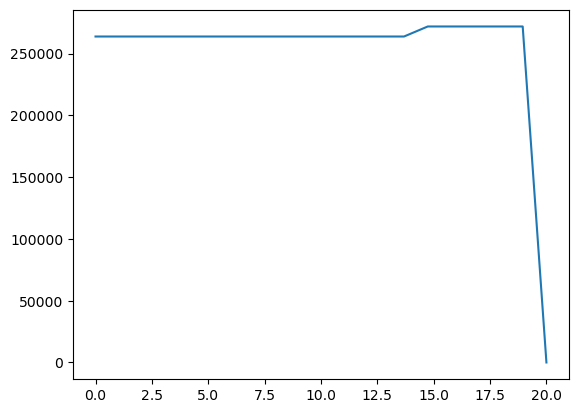

In [ ]:
###Axial Problem

##Stiffness

#Al
A_Al = (math.pi)*((Ra**2)-(Ri**2))

#CFRP
#There is a different area occupied by each of the 8 layers:
t_cfrp_layers = (Rc-Ra)/8 #radial thickness of layers
A_0_1 = (math.pi)*(-(Ra**2)+(Ra+t_cfrp_layers)**2)
A_45_1 = (math.pi)*(-((Ra+t_cfrp_layers)**2)+(Ra+2*t_cfrp_layers)**2)
A_neg45_1 = (math.pi)*(-((Ra+2*t_cfrp_layers)**2)+(Ra+3*t_cfrp_layers)**2)
A_90_1 = (math.pi)*(-((Ra+3*t_cfrp_layers)**2)+(Ra+4*t_cfrp_layers)**2)
A_90_2 = (math.pi)*(-((Ra+4*t_cfrp_layers)**2)+(Ra+5*t_cfrp_layers)**2)
A_neg45_2 = (math.pi)*(-((Ra+5*t_cfrp_layers)**2)+(Ra+6*t_cfrp_layers)**2)
A_45_2 = (math.pi)*(-((Ra+6*t_cfrp_layers)**2)+(Ra+7*t_cfrp_layers)**2)
A_0_2 = (math.pi)*(-((Ra+7*t_cfrp_layers)**2)+(Ra+8*t_cfrp_layers)**2)

#axial stiffness
S = Ec_Al*A_Al + E11_cfrp*(A_0_1 + A_0_2) +E22_cfrp*(A_45_1+A_45_2+A_neg45_1+A_neg45_2+A_90_1+A_90_2)

##Strain
#Axial strain due to axial load only
axial_strain1 = np.zeros(len(N1))
for i in range(0, len(axial_strain1)):
    axial_strain1[i] = (N1[i])/S



In [44]:
#Bending Problem
v21_cfrp = E22_cfrp*(v12_cfrp/(E11_cfrp)) #relationship between v21 and v12

Q = np.array([[(E11_cfrp)/(1-v12_cfrp), (v21_cfrp*E11_cfrp)/(1-v12_cfrp*v21_cfrp), 0],
     [(v12_cfrp*E22_cfrp)/(1-v12_cfrp), E22_cfrp/(1-v12_cfrp), 0],
     [0,0,G12_cfrp]])

def makeTmatrix(beta):
        #This function takes each of the angles of the CFRP and produces a rotation matrix T
        T = np.array([[(math.cos(beta))**2,(math.sin(beta))**2, 2*math.sin(beta)*math.cos(beta)],[(math.sin(beta))**2, (math.cos(beta))**2, -2*math.sin(beta)*math.cos(beta)],[-math.sin(beta)*math.cos(beta), math.sin(beta)*math.cos(beta), (math.cos(beta))**2 - (math.sin(beta))**2 ]])
        return T

T_0 = makeTmatrix(0)
T_neg45 = makeTmatrix(-((math.pi)/4))
T_45 = makeTmatrix((math.pi)/4)
T_90 = makeTmatrix(((math.pi)/2))

R = np.array([[1,0,0],[0,1,0],[0,0,2]]) #Reuter's Matrix
def makeQbar(T, R, Q):
        #This function transforms Q into Qbar using the T and R matrices
        Qbar = np.matmul(np.linalg.inv(T), Q)
        Qbar = np.matmul(Qbar,R)
        Qbar = np.matmul(Qbar,T)
        Qbar = np.matmul(Qbar,np.linalg.inv(R))
        return Qbar

Qbar_0 = makeQbar(T_0, R, Q)
Qbar_neg45 = makeQbar(T_neg45, R, Q)
Qbar_45 = makeQbar(T_45, R, Q)
Qbar_90 = makeQbar(T_90, R, Q)

#Here, we define the Sbar matrix which is the inverse of the Qbar matrix
Sbar_0 = np.linalg.inv(Qbar_0)
Sbar_neg45 = np.linalg.inv(Qbar_neg45)
Sbar_45 = np.linalg.inv(Qbar_45)
Sbar_90 = np.linalg.inv(Qbar_90)

#All we have to do to solve for Ex1x1 is to take the (1,1) term of each Sbar matrix and divde 1 by it
Ex1x1_0 = 1/(Sbar_0[0,0])
Ex1x1_neg45 = 1/(Sbar_neg45[0,0])
Ex1x1_45 = 1/(Sbar_45[0,0])
Ex1x1_90 = 1/(Sbar_90[0,0])

#H33c = w*sum(Ex1x1*(x2i-x2i+1)/3)




        

